In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Churn Modeling.csv')
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [ ]:
df.shape
#there are 10k observations and 14 variables

(10000, 14)

In [ ]:
print(df.info())
#there are no non values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


#Data Visualization

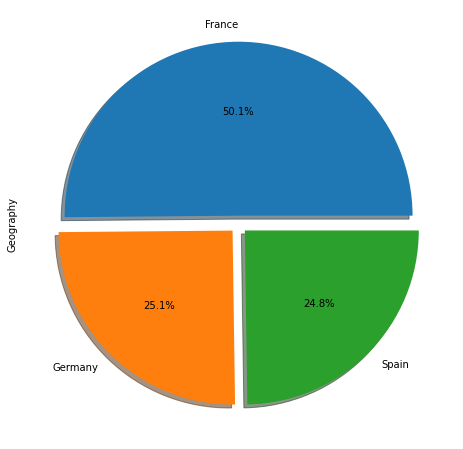

In [ ]:
f,ax=plt.subplots(figsize=(18,8))

df['Geography'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

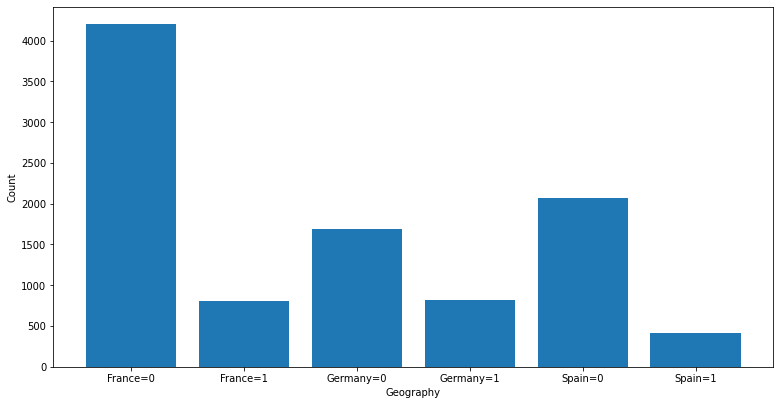

0    4204
1     810
Name: Exited, dtype: int64 0    1695
1     814
Name: Exited, dtype: int64 0    2064
1     413
Name: Exited, dtype: int64


In [ ]:
i = df[df["Geography"]=="France"]["Exited"].value_counts()
j= df[df["Geography"]=="Germany"]["Exited"].value_counts()
k = df[df["Geography"]=="Spain"]["Exited"].value_counts()

#print(i[0],i[1] ,j[0],j[1], k[0],k[1])
#print(i,j,k)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Count")
ax.set_xlabel("Geography")
f=["France=0","France=1","Germany=0","Germany=1" , "Spain=0","Spain=1"]
g= [i[0],i[1], j[0],j[1], k[0],k[1]]
ax.bar(f, g)
plt.show()
print(i,j,k)

0.2507153863086066 3404 1139 4559 898 0.16455928165658787
0    3404
1    1139
Name: Exited, dtype: int64 0    4559
1     898
Name: Exited, dtype: int64


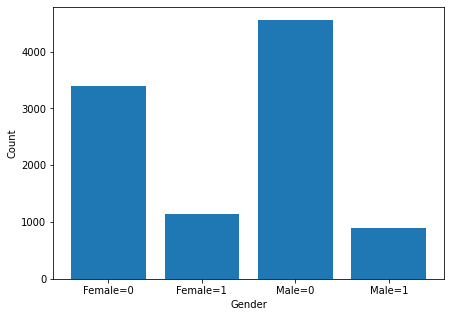

In [ ]:
i = df[df["Gender"]=="Female"]["Exited"].value_counts()
j= df[df["Gender"]=="Male"]["Exited"].value_counts()

print( df[df["Gender"]=="Female"]["Exited"].mean(),i[0],i[1], j[0],j[1],df[df["Gender"]=="Male"]["Exited"].mean() )
print(i,j)
fig,ax= plt.subplots(figsize=(7,5))
ax.set_ylabel("Count")
ax.set_xlabel("Gender")
f=["Female=0","Female=1","Male=0","Male=1"]
g= [i[0],i[1], j[0],j[1] ]
ax.bar(f, g)
plt.show()

In [ ]:
max =df["Balance"].max()
min =df["Balance"].min()
a= df.loc[(df["Balance"]> min) &( df["Balance"]< max/5), "Exited"].value_counts()
b= df.loc[(df["Balance"]> max/5) &( df["Balance"]< 2*max/5), "Exited"].value_counts()
c= df.loc[(df["Balance"]> 2*max/5) &( df["Balance"]< 3*max/5), "Exited"].value_counts()
d= df.loc[(df["Balance"]> 3*max/5) &( df["Balance"]< 4*max/5), "Exited"].value_counts()
e= df.loc[df["Balance"]> 4*max/5, "Exited"].value_counts()

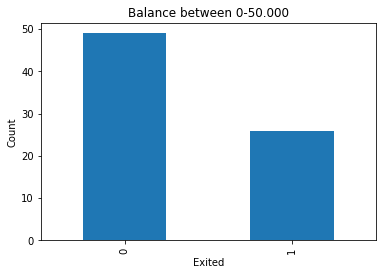

In [ ]:
a.plot(kind='bar',title="Balance between 0-50.000", ylabel="Count", xlabel="Exited")
plt.show()

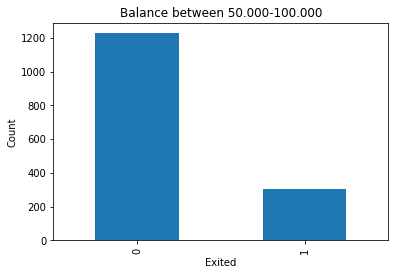

In [ ]:
b.plot(kind='bar',title="Balance between 50.000-100.000", ylabel="Count", xlabel="Exited")
plt.show()

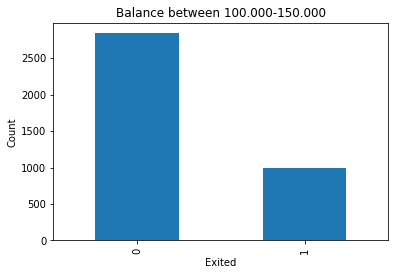

In [ ]:
c.plot(kind='bar',title="Balance between 100.000-150.000", ylabel="Count", xlabel="Exited")
plt.show()

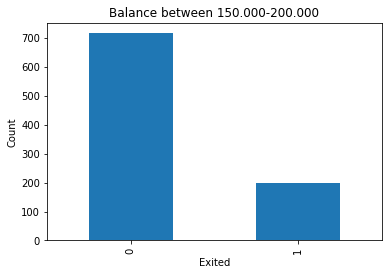

In [ ]:
d.plot(kind='bar',title="Balance between 150.000-200.000", ylabel="Count", xlabel="Exited")
plt.show()

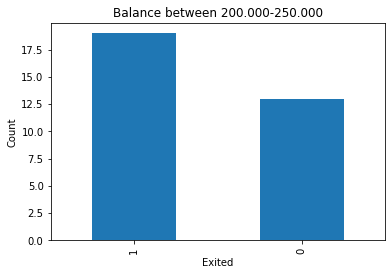

In [ ]:
e.plot(kind='bar',title="Balance between 200.000-250.000", ylabel="Count", xlabel="Exited")
plt.show()

In [ ]:
max_cr =df["CreditScore"].max()
min_cr =df["CreditScore"].min()
print(max_cr)
print(min_cr)
a1= df.loc[(df["CreditScore"]> min_cr) &( df["CreditScore"]> min_cr+100), "Exited"].value_counts()     #between 350-450
a2= df.loc[(df["CreditScore"]> min_cr+100) &( df["CreditScore"]> min_cr+200), "Exited"].value_counts() #between 450-550
a3= df.loc[(df["CreditScore"]> min_cr+200) &( df["CreditScore"]> min_cr+300), "Exited"].value_counts() #between 550-650 
a4= df.loc[(df["CreditScore"]> min_cr+300) &( df["CreditScore"]> min_cr+400), "Exited"].value_counts() #between 650-750
a5= df.loc[(df["CreditScore"]> min_cr+400) &( df["CreditScore"]< max_cr), "Exited"].value_counts() #between 750-850

850
350


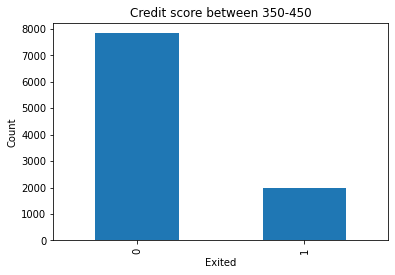

In [ ]:
a1.plot(kind='bar',title="Credit score between 350-450", ylabel="Count", xlabel="Exited")
plt.show()

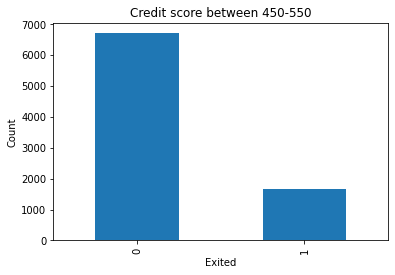

In [ ]:
a2.plot(kind='bar',title="Credit score between 450-550", ylabel="Count", xlabel="Exited")
plt.show()

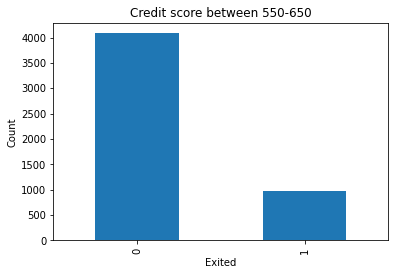

In [ ]:
a3.plot(kind='bar',title="Credit score between 550-650", ylabel="Count", xlabel="Exited")
plt.show()

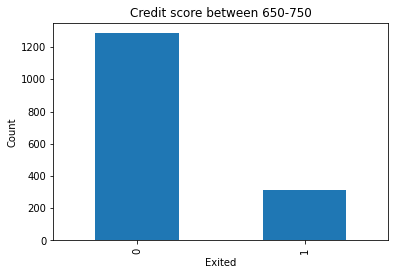

In [ ]:
a4.plot(kind='bar',title="Credit score between 650-750", ylabel="Count", xlabel="Exited")
plt.show()

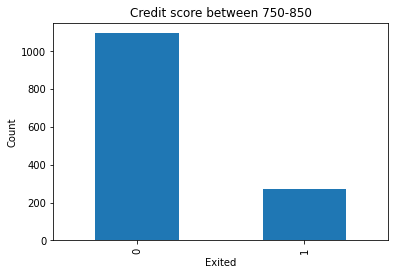

In [ ]:
a5.plot(kind='bar',title="Credit score between 750-850", ylabel="Count", xlabel="Exited")
plt.show()

#Preprocessing of Data

In [ ]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'] )
#we are discarding unrelevant features because they will only confuse our model.

In [ ]:
##y = df.iloc[:, -1].values   #independent variable
#df = df.iloc[:, :-1].values  #dependent variables

In [ ]:
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
df =df.drop(columns="Exited")
df

CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0             619    France  Female  ...          1               1        101348.88
1             608     Spain  Female  ...          0               1        112542.58
2             502    France  Female  ...          1               0        113931.57
3             699    France  Female  ...          0               0         93826.63
4             850     Spain  Female  ...          1               1         79084.10
...           ...       ...     ...  ...        ...             ...              ...
9995          771    France    Male  ...          1               0         96270.64
9996          516    France    Male  ...          1               1        101699.77
9997          709    France  Female  ...          0               1         42085.58
9998          772   Germany    Male  ...          1               0         92888.52
9999          792    France  Female  ...          1               0         38190.78

[10000 rows x 10 columns]

In [ ]:
df.head()
#these are the features that we will use in our model, and exited is our target model

CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0          619    France  Female  ...          1               1        101348.88
1          608     Spain  Female  ...          0               1        112542.58
2          502    France  Female  ...          1               0        113931.57
3          699    France  Female  ...          0               0         93826.63
4          850     Spain  Female  ...          1               1         79084.10

[5 rows x 10 columns]

In [ ]:
#we will make geography a categorical variable, also make gender binary categorized.  in order to easen the model's understanding. string variables are not understandable by logistic regressor. 
from sklearn.preprocessing import OneHotEncoder

category_enc     = OneHotEncoder(handle_unknown='ignore')
category_enc_fit = category_enc.fit_transform(df[["Geography", "Gender"]]).toarray()

category_enc_fit_df = pd.DataFrame(category_enc_fit)

df = pd.merge(df, category_enc_fit_df, right_index=True,left_index=True)
df = df.drop(columns = ["Geography", "Gender"])
#since we have categorically transformed ones, we can get rid of string column variables

#By using max-min scaling, everything is scaled
df["Age"]= (df["Age"]-df["Age"].min())/(df["Age"].max()-df["Age"].min())
df["CreditScore"]= (df["CreditScore"]-df["CreditScore"].min())/(df["CreditScore"].max()-df["CreditScore"].min())
df["Tenure"]= (df["Tenure"]-df["Tenure"].min())/(df["Tenure"].max()-df["Tenure"].min())
df["EstimatedSalary"]= (df["EstimatedSalary"]-df["EstimatedSalary"].min())/(df["EstimatedSalary"].max()-df["EstimatedSalary"].min())
df["NumOfProducts"]= (df["NumOfProducts"]-df["NumOfProducts"].min())/(df["NumOfProducts"].max()-df["NumOfProducts"].min())

In [ ]:
df.head()

CreditScore       Age  Tenure    Balance  ...    1    2    3    4
0        0.538  0.324324     0.2       0.00  ...  0.0  0.0  1.0  0.0
1        0.516  0.310811     0.1   83807.86  ...  0.0  1.0  1.0  0.0
2        0.304  0.324324     0.8  159660.80  ...  0.0  0.0  1.0  0.0
3        0.698  0.283784     0.1       0.00  ...  0.0  0.0  1.0  0.0
4        1.000  0.337838     0.2  125510.82  ...  0.0  1.0  1.0  0.0

[5 rows x 13 columns]

#Creating Models and Applying

##Splitting the Data as Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [ ]:
print(x_train)

      CreditScore       Age  Tenure    Balance  ...    1    2    3    4
7389        0.634  0.216216     0.5       0.00  ...  0.0  1.0  1.0  0.0
9275        0.154  0.324324     0.1   75681.52  ...  1.0  0.0  0.0  1.0
2995        0.370  0.148649     0.2  112367.34  ...  0.0  0.0  1.0  0.0
5316        0.608  0.297297     0.5  105683.63  ...  0.0  1.0  0.0  1.0
356         1.000  0.527027     0.8  126776.30  ...  0.0  1.0  1.0  0.0
...           ...       ...     ...        ...  ...  ...  ...  ...  ...
9225        0.488  0.189189     0.4  120074.97  ...  1.0  0.0  1.0  0.0
4859        0.888  0.054054     0.4  114440.24  ...  0.0  1.0  1.0  0.0
3264        0.776  0.229730     0.5  161274.05  ...  0.0  0.0  0.0  1.0
9845        0.480  0.270270     0.9       0.00  ...  0.0  1.0  1.0  0.0
2732        0.546  0.405405     0.1  108076.33  ...  1.0  0.0  1.0  0.0

[8000 rows x 13 columns]


In [ ]:
print(x_test)

      CreditScore       Age  Tenure    Balance  ...    1    2    3    4
9394        0.494  0.229730     0.8  131101.04  ...  1.0  0.0  1.0  0.0
898         0.346  0.297297     0.2  102967.41  ...  0.0  0.0  1.0  0.0
2398        0.712  0.324324     0.8   95386.82  ...  0.0  1.0  1.0  0.0
5906        0.876  0.189189     0.4  112079.58  ...  0.0  0.0  0.0  1.0
2343        0.712  0.270270     0.5  163034.82  ...  1.0  0.0  0.0  1.0
...           ...       ...     ...        ...  ...  ...  ...  ...  ...
1037        0.550  0.081081     0.1       0.00  ...  0.0  0.0  1.0  0.0
2899        0.472  0.229730     0.7       0.00  ...  0.0  0.0  1.0  0.0
9549        0.456  0.243243     0.1  157267.95  ...  0.0  1.0  0.0  1.0
2740        0.600  0.216216     0.4  142393.11  ...  1.0  0.0  0.0  1.0
6690        0.446  0.162162     0.8  127406.50  ...  1.0  0.0  0.0  1.0

[2000 rows x 13 columns]


In [ ]:
print(y_train)

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64


In [ ]:
print(y_test)

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64


In [ ]:
x_train.shape

(8000, 13)

In [ ]:
x_test.shape

(2000, 13)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dec_classifier = DecisionTreeClassifier(random_state =42)
dec_classifier.fit(x_train, y_train)
pred_y_dec = dec_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dec = confusion_matrix(y_test, pred_y_dec)
print(cm_dec)
accuracy_score(y_test, pred_y_dec)

[[1380  215]
 [ 174  231]]


0.8055

Text(33.0, 0.5, 'Truth')

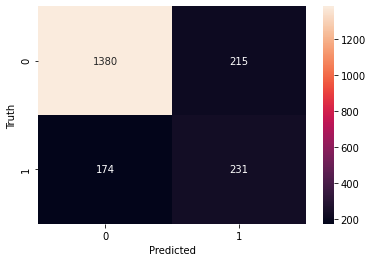

In [ ]:
import seaborn as sn
sn.heatmap(cm_dec,annot = True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dec_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.575678 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.575678 to fit



##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state = 0)
logistic_classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_y_log = logistic_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log = confusion_matrix(y_test, pred_y_log)
print(cm_log)
accuracy_score(y_test, pred_y_log)

[[1595    0]
 [ 405    0]]


0.7975

Text(33.0, 0.5, 'Truth')

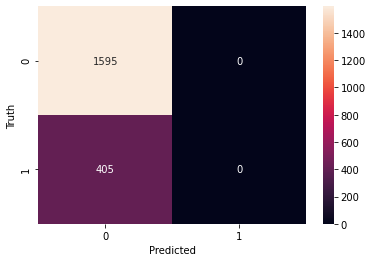

In [ ]:
import seaborn as sn
sn.heatmap(cm_log,annot = True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
pred_y_knn = knn_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_test, pred_y_knn)
print(cm_knn)
accuracy_score(y_test, pred_y_knn)

[[1400  195]
 [ 328   77]]


0.7385

Text(33.0, 0.5, 'Truth')

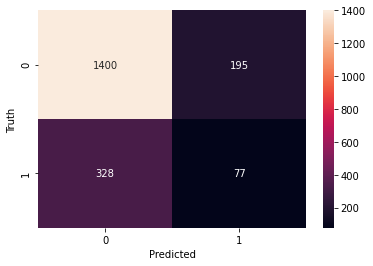

In [ ]:
import seaborn as sn
sn.heatmap(cm_knn,annot = True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')